# Import

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

# EDA

In [2]:
# Import du dataset
link = 'transactions.csv'

df = pd.read_csv(link)

df.head()

,CustomerID,PurchaseDate,Amount
0,C082,2024-03-24 09:20:01.512658,34.76
1,C036,2024-01-16 09:20:01.512679,230.98
2,C095,2024-03-29 09:20:01.512682,679.93
3,C070,2024-04-06 09:20:01.512684,594.59
4,C005,2024-05-05 09:20:01.512687,102.76


In [3]:
# Nombre de clients unique

df['CustomerID'].nunique()

100

In [4]:
# Nombre de transactions

df.shape

(1000, 3)

In [5]:
# Valeurs manquantes ?

df.isna().sum()

CustomerID      0
PurchaseDate    0
Amount          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    1000 non-null   object 
 1   PurchaseDate  1000 non-null   object 
 2   Amount        1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [7]:
# On transforme la colonne PurchaseDate en datetime format

df["PurchaseDate"] = pd.to_datetime(df['PurchaseDate'])

In [8]:
# On récupère la date d'aujourd'hui dans la variable today

today = datetime.now()

In [9]:
# Création d'une table rfm

rfm = df.groupby('CustomerID').agg(
    {
        'PurchaseDate' : lambda x: (today - x.max()).days, # Calcul du nombre de jours entre la date d'aujourd'hui et la date de la dernière commande par clients
        'CustomerID' : 'count',
        'Amount' : 'sum',
        }
    ).rename(columns={
            'PurchaseDate' : 'Recency',
            'CustomerID' : 'Frequency',
            'Amount' : 'Monetary',
        }
    ).reset_index()

In [10]:
# Affichage de la table

rfm

,CustomerID,Recency,Frequency,Monetary
0,C001,56,11,5481.01
1,C002,10,7,3736.29
2,C003,27,11,4486.89
3,C004,43,8,3311.74
4,C005,17,7,3250.58
...,...,...,...,...
95,C096,34,10,5322.53
96,C097,13,15,7750.71
97,C098,93,8,3813.09
98,C099,30,9,6710.65


# Visualisations

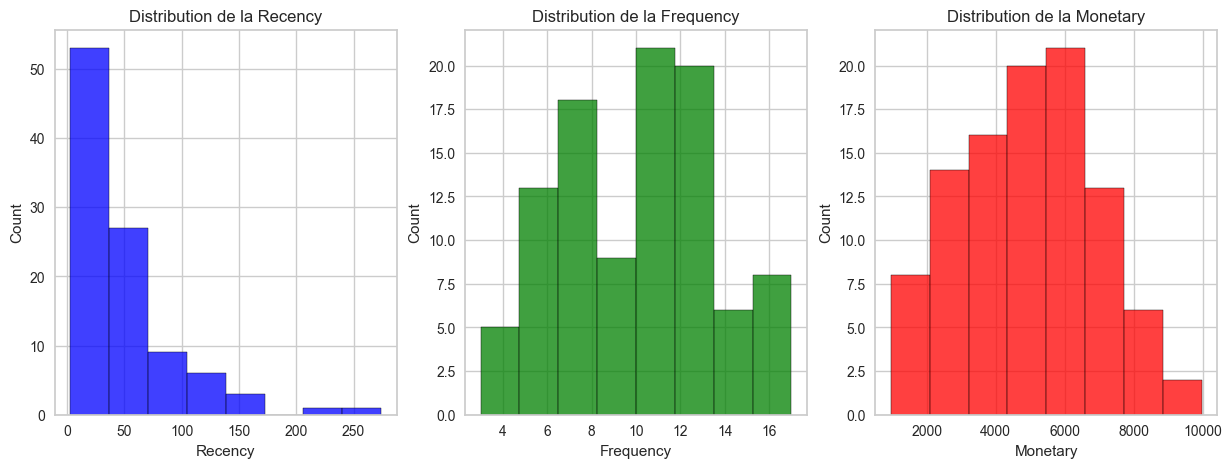

In [11]:
# On créé 3 histogrammes pour voir la distribution de chaque colonnes

figs, axs = plt.subplots(1,3, figsize=(15,5))

sns.histplot(
    rfm['Recency'],
    ax=axs[0],
    color='blue',
    bins="sturges",
)
axs[0].set_title('Distribution de la Recency')

sns.histplot(
    rfm['Frequency'],
    ax=axs[1],
    color='green',
    bins="sturges",
)
axs[1].set_title('Distribution de la Frequency')

sns.histplot(
    rfm['Monetary'],
    ax=axs[2],
    color='red',
    bins="sturges",
)
axs[2].set_title('Distribution de la Monetary')

plt.show()

# K-Means

In [12]:
# Standardisation des données

scaler_std = StandardScaler()

In [13]:
X_scaled = scaler_std.fit_transform(rfm[rfm.columns[1:]])

X_scaled

array([[ 1.85431600e-01,  2.95140668e-01,  2.65018508e-01],
       [-8.09883873e-01, -8.85422004e-01, -6.53546261e-01],
       [-4.42049894e-01,  2.95140668e-01, -2.58368401e-01],
       [-9.58532075e-02, -5.90281336e-01, -8.77064460e-01],
       [-6.58422823e-01, -8.85422004e-01, -9.09264138e-01],
       [-5.71873651e-01,  5.90281336e-01,  3.44285733e-01],
       [-4.42049894e-01,  0.00000000e+00,  2.34535164e-01],
       [-4.42049894e-01, -8.85422004e-01, -9.79591687e-01],
       [-6.36785530e-01,  5.90281336e-01,  7.47724105e-01],
       [ 4.01804529e-01,  8.85422004e-01,  8.57706326e-01],
       [ 2.07068893e-01, -5.90281336e-01, -3.79290931e-01],
       [-4.63687187e-01, -5.90281336e-01, -6.03625178e-01],
       [-4.42049894e-01, -2.95140668e-01, -9.40468763e-01],
       [-7.01697408e-01,  1.18056267e+00,  1.94206595e-01],
       [ 7.72451356e-02, -5.90281336e-01, -1.53745773e-01],
       [-9.18070337e-01, -5.90281336e-01, -5.42800640e-01],
       [ 2.04623879e+00, -1.18056267e+00

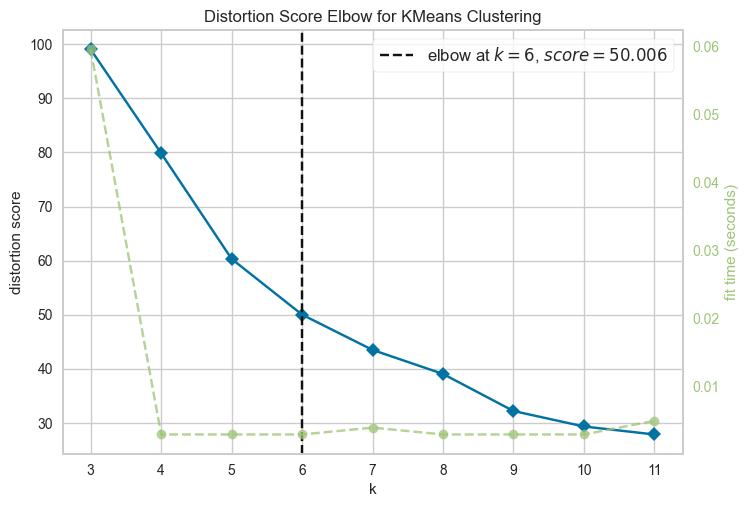

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# On utilise le KElbowVisualizer pour trouver le nombre de cluster le plus adapté

model = KMeans(n_init='auto', random_state=42)

visualiser = KElbowVisualizer(model, k=(3,12))

visualiser.fit(X_scaled)

visualiser.show()

In [15]:
# On divise le jeu de données en 6 clusters

kmeans = KMeans(n_clusters=6, n_init='auto', random_state=42)

kmeans.fit(X_scaled)

# On rajoute le noms des clusters dans le dataframe

rfm['cluster'] = kmeans.labels_

In [16]:
rfm

,CustomerID,Recency,Frequency,Monetary,cluster
0,C001,56,11,5481.01,5
1,C002,10,7,3736.29,0
2,C003,27,11,4486.89,5
3,C004,43,8,3311.74,0
4,C005,17,7,3250.58,0
...,...,...,...,...,...
95,C096,34,10,5322.53,5
96,C097,13,15,7750.71,1
97,C098,93,8,3813.09,4
98,C099,30,9,6710.65,5


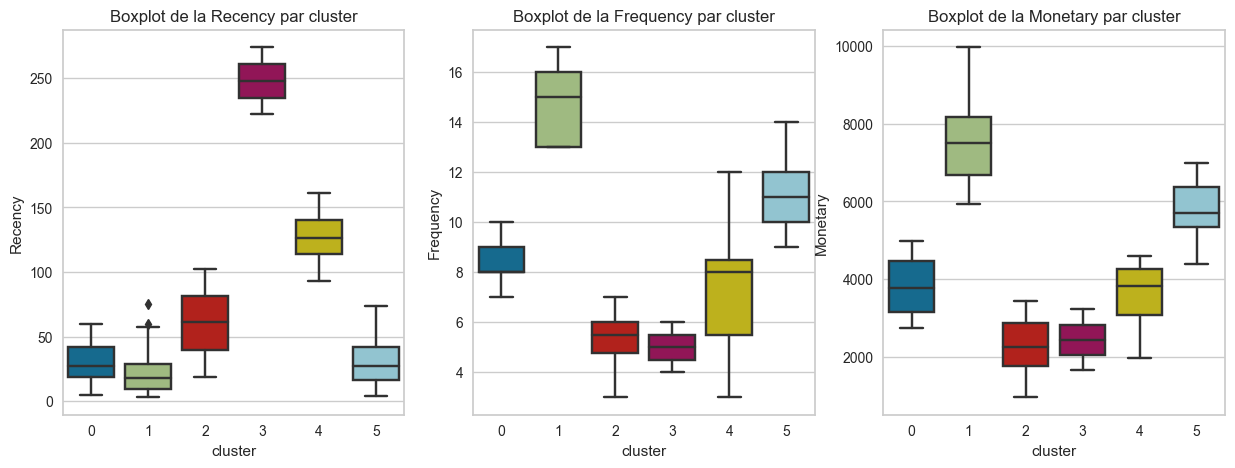

In [17]:
figs, axs = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(
    x=rfm['cluster'],
    y=rfm['Recency'],
    ax=axs[0],
)
axs[0].set_title('Boxplot de la Recency par cluster')

sns.boxplot(
    x=rfm['cluster'],
    y=rfm['Frequency'],
    ax=axs[1],
)
axs[1].set_title('Boxplot de la Frequency par cluster')

sns.boxplot(
    x=rfm['cluster'],
    y=rfm['Monetary'],
    ax=axs[2],
)
axs[2].set_title('Boxplot de la Monetary par cluster')

plt.show()

# Clustering Hierarchique Agglomératif

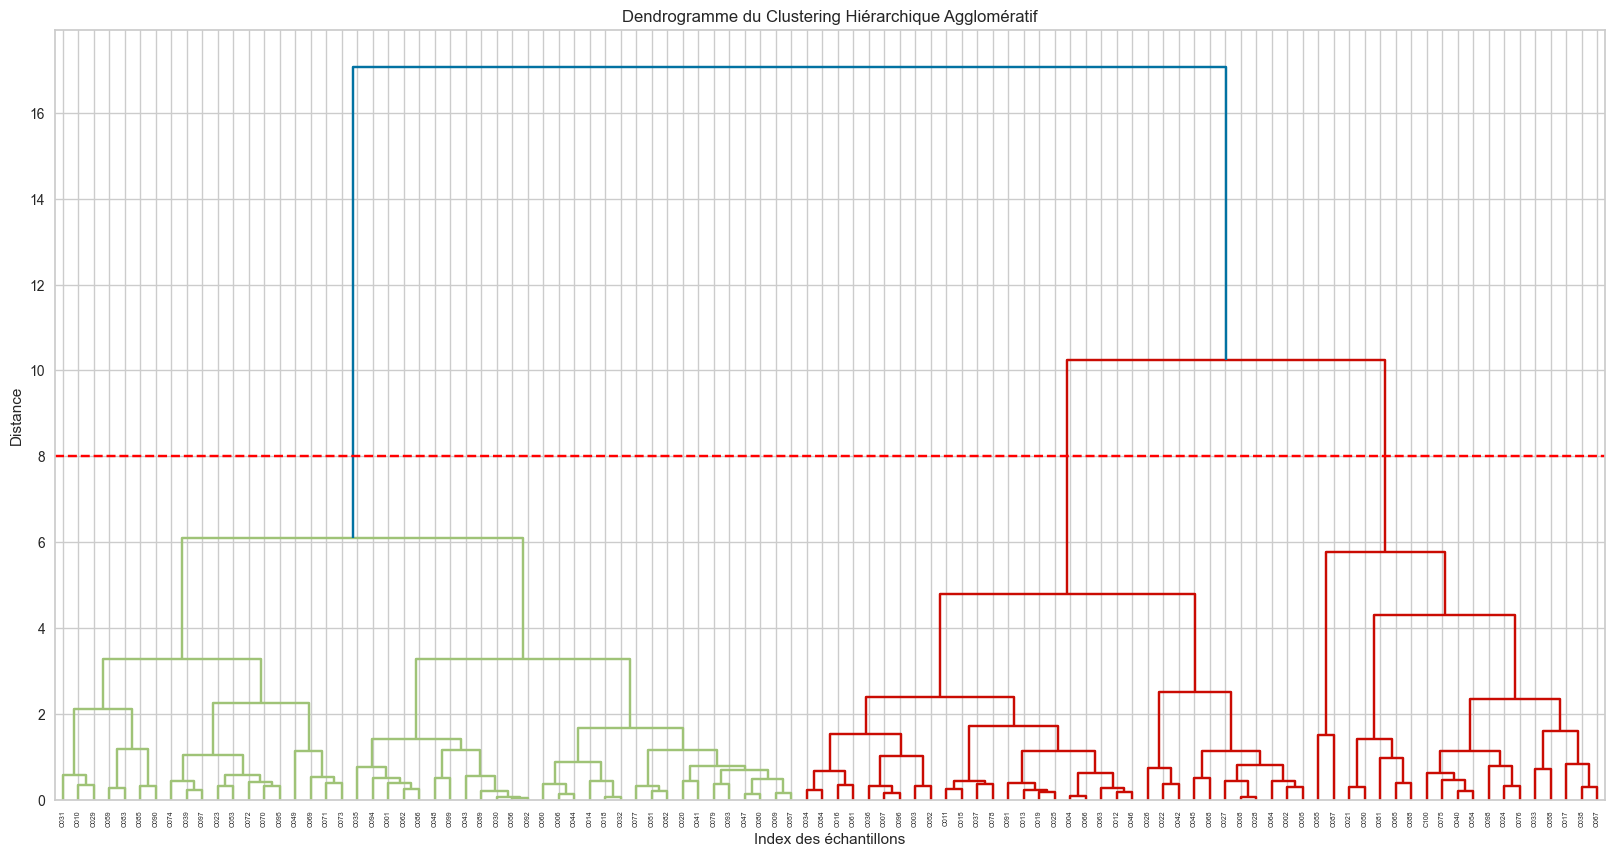

In [18]:
# Calculer la matrice de liaison

Z = linkage(X_scaled, method='ward')

# Afficher le dendrogramme

plt.figure(figsize=(20,10))
plt.title("Dendrogramme du Clustering Hiérarchique Agglomératif")
dendrogram(Z, labels=rfm.CustomerID.to_list())
plt.axhline(y=8,color='red',linestyle='--')
plt.xlabel('Index des échantillons')
plt.ylabel('Distance')
plt.show()

In [19]:
# Création de 3 clusters sur le dataset
agg_clustering = AgglomerativeClustering(n_clusters=3)

agg_clustering.fit(X_scaled)

# On rajoute le numéro du cluster pour chaque client
rfm['cluster_agg'] = agg_clustering.labels_

rfm

,CustomerID,Recency,Frequency,Monetary,cluster,cluster_agg
0,C001,56,11,5481.01,5,0
1,C002,10,7,3736.29,0,2
2,C003,27,11,4486.89,5,2
3,C004,43,8,3311.74,0,2
4,C005,17,7,3250.58,0,2
...,...,...,...,...,...,...
95,C096,34,10,5322.53,5,2
96,C097,13,15,7750.71,1,0
97,C098,93,8,3813.09,4,1
98,C099,30,9,6710.65,5,0


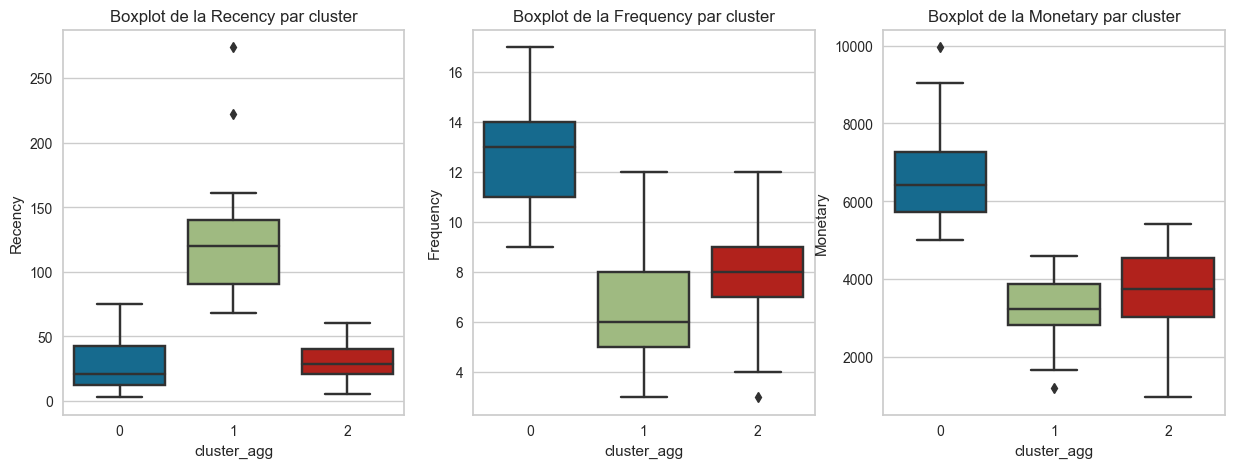

In [20]:
figs, axs = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(
    x=rfm['cluster_agg'],
    y=rfm['Recency'],
    ax=axs[0],
)
axs[0].set_title('Boxplot de la Recency par cluster')

sns.boxplot(
    x=rfm['cluster_agg'],
    y=rfm['Frequency'],
    ax=axs[1],
)
axs[1].set_title('Boxplot de la Frequency par cluster')

sns.boxplot(
    x=rfm['cluster_agg'],
    y=rfm['Monetary'],
    ax=axs[2],
)
axs[2].set_title('Boxplot de la Monetary par cluster')

plt.show()

# PCA

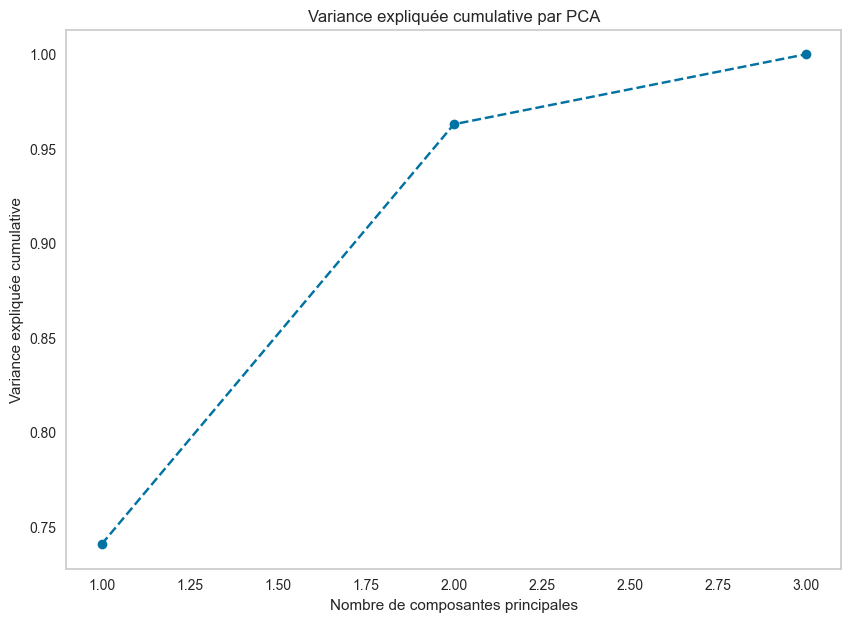

In [21]:
# Appliquer PCA

pca = PCA()
pca.fit(X_scaled)

# Calculer la variance expliquée cumulative

explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Afficher la variance expliquée cumulative

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variance expliquée cumulative par PCA')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulative')
plt.grid()
plt.show()

In [22]:
# On garde que 2 composantes pour garder environ 0.98% des informations
pca = PCA(n_components=2)

df_pca = pd.DataFrame(pca.fit_transform(X_scaled), columns=['PC1', 'PC2'])

df_pca

,PC1,PC2
0,-0.265132,0.346796
1,0.589756,-1.214375
2,-0.230164,-0.395416
3,0.873772,-0.573977
4,0.819153,-1.171546
...,...,...
95,-0.247735,-0.192441
96,-2.184705,0.301916
97,1.210929,0.477890
98,-0.556705,-0.096367


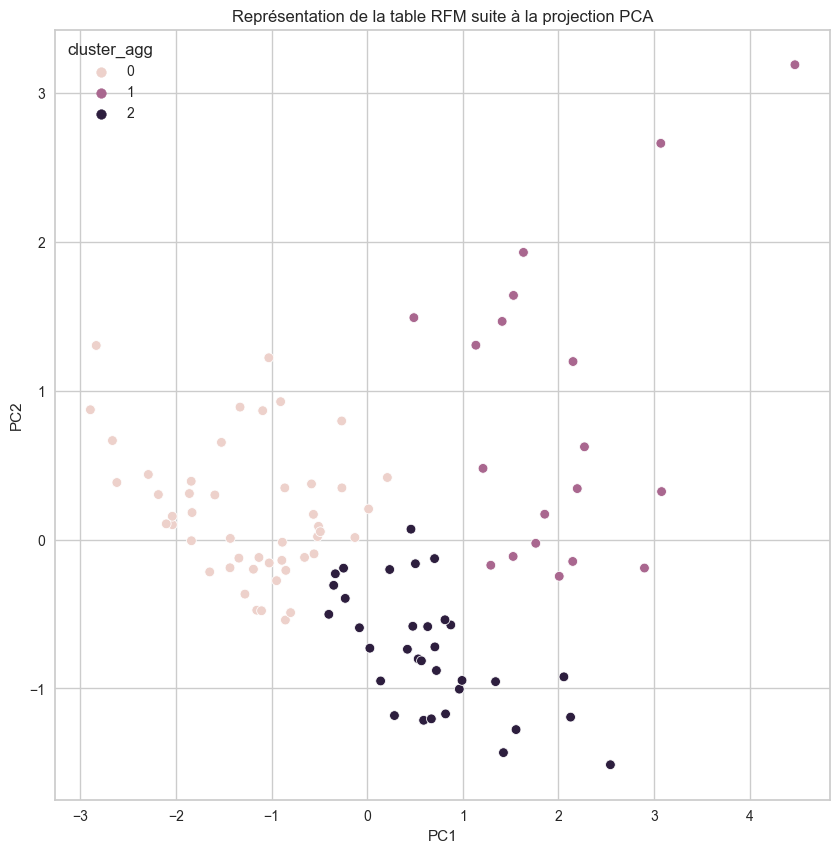

In [23]:
plt.figure(figsize=(10,10))

sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue=rfm['cluster_agg'],
)

plt.title('Représentation de la table RFM suite à la projection PCA')

plt.show()

In [24]:
# On rajoute les données projetées dans le dataframe avec les valeurs rfm scalées 

df_X_scaled = pd.DataFrame(data=X_scaled, columns=rfm.columns[1:4])

df_heatmap = pd.concat([df_X_scaled, df_pca], axis=1)

df_heatmap

,Recency,Frequency,Monetary,PC1,PC2
0,0.185432,0.295141,0.265019,-0.265132,0.346796
1,-0.809884,-0.885422,-0.653546,0.589756,-1.214375
2,-0.442050,0.295141,-0.258368,-0.230164,-0.395416
3,-0.095853,-0.590281,-0.877064,0.873772,-0.573977
4,-0.658423,-0.885422,-0.909264,0.819153,-1.171546
...,...,...,...,...,...
95,-0.290589,0.000000,0.181582,-0.247735,-0.192441
96,-0.744972,1.475703,1.459976,-2.184705,0.301916
97,0.986011,-0.590281,-0.613112,1.210929,0.477890
98,-0.377138,-0.295141,0.912403,-0.556705,-0.096367


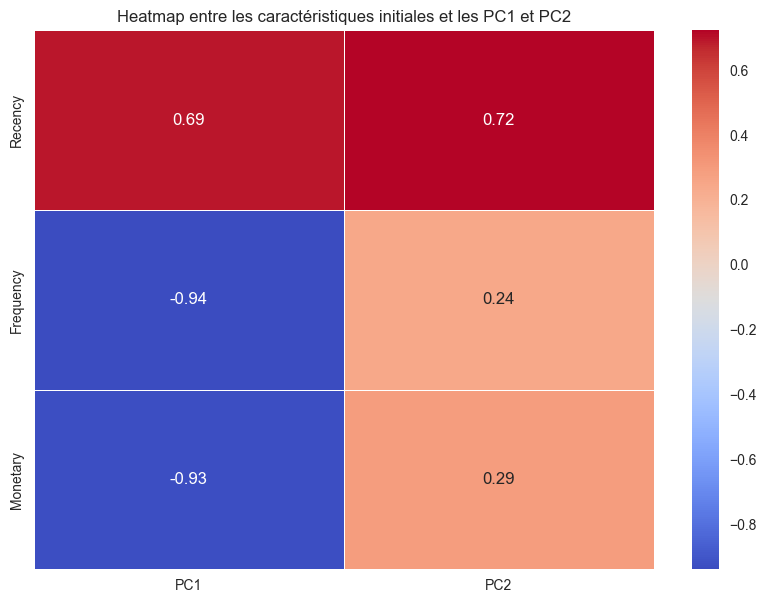

In [25]:
# On créé une heatmap pour vérifier la corrélation entre les variables et les valeurs projetées sur les composantes

df_heatmap_corr = df_heatmap.corr()[['PC1', 'PC2']].loc[['Recency', 'Frequency', 'Monetary'], ['PC1', 'PC2']]

plt.figure(figsize=(10, 7))
sns.heatmap(df_heatmap_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap entre les caractéristiques initiales et les PC1 et PC2')
plt.show()